# Plot3D Python Tutorial
In this tutorial you will learn about the Plot3D NASA Standard and how to use NASA's Plot3D python library to read, write, find connectivity, split blocks, and find periodicity.

## About Plot3D
Plot3D is a standard for defining a simple structured grid. This standard was developed in the 1980's [User Manual](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiLm_2Q8JjzAhUCB50JHTfFCM4QFnoECAMQAQ&url=https%3A%2F%2Fwww.grc.nasa.gov%2Fwww%2Fwinddocs%2Ftowne%2Fplotc%2Fplotc_p3d.html&usg=AOvVaw0iKPGjnhjiQA9AFZcFhkEE) 

To understand the plot3D standard, we must first start with the definition of an array. The figure below shows a box with 6 faces and 8 verticies represented by black dots. Now if you were to discretize a geometry into many of these boxes all connected to each other. You would have many x,y,z points. To organize things we arrange all this points into an array of x's, y'z, z's and we label them as capital X, Y, Z. 

![Array](https://raw.githubusercontent.com/nasa/Plot3D_utilities/main/colab/images/array_definition.png)

So what does this mean? how is this helpful. It depends on how to arrange the array. If you have a single dimensional array of x like x<sub>1</sub>,x<sub>2</sub>,x<sub>3</sub>, ..., x<sub>n</sub>. This isn't particularly useful because it's hard to split it in to faces - just try it with the simple box above. So what we do instead is represent x as a 3-dimensional array instead of a single dimension. For example x[0,0,0] or x<sub>0,0,0</sub> = some value. 
The image below shows how we arrange the x values of each of the vertices. 


![Array](https://raw.githubusercontent.com/nasa/Plot3D_utilities/main/colab/images/array_definition2.png)

With this new arrangement of x into a 3-dimensional array, x[i,j,k]. We can easily extract a face. For example the front face is defined by x[0,0,0] x[1,0,0], x[0,1,0], x[1,1,0]. Do you notice anything interesting from this array? The third index "k" is 0. **To define a face you simply set either i, j, or k to be a constant value.** For outer faces you would use KMIN or KMAX. Depending on the programming language the indicies may start at 1 or 0. In python we start at 0 and end at n-1. [More info on Python Arrays](https://www.w3schools.com/python/python_arrays.asp)





# Environment Setup
This step is relatively short. Run the code below to install plot3d 

In [2]:
!pip install plot3d

     |████████████████████████████████| 10.3 MB 887 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Reading and Writing a mesh file 
In simple words, a mesh is a collection of boxes arranged to form a shape. In this example we will explore reading a mesh in ASCII and saving it into a binary format. 




## Step 1: Load the functions from the library

In [1]:
from plot3d import read_plot3D, write_plot3D,Block

## Step 2: Download and read the mesh file
The code below reads the plot3D into a variable called blocks. "blocks" is a variable representing an array of plot3D blocks. You can think of a block as a 6 sided cube but inside the cube you have multiple smaller cubes. Cubes can be stretched and wrapped such that two ends are connected. This is called an o-mesh. We will plot this in a later step. 

In [1]:
!wget https://nasa-public-data.s3.amazonaws.com/plot3d_utilities/PahtCascade-ASCII.xyz

--2021-09-25 04:11:09--  https://nasa-public-data.s3.amazonaws.com/plot3d_utilities/PahtCascade-ASCII.xyz
Resolving nasa-public-data.s3.amazonaws.com (nasa-public-data.s3.amazonaws.com)... 52.217.74.156
Connecting to nasa-public-data.s3.amazonaws.com (nasa-public-data.s3.amazonaws.com)|52.217.74.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82072023 (78M) [application/x-www-form-urlencoded]
Saving to: ‘PahtCascade-ASCII.xyz’

PahtCascade-ASCII.x 100%[===================>]  78.27M  34.0MB/s    in 2.3s    

2021-09-25 04:11:11 (34.0 MB/s) - ‘PahtCascade-ASCII.xyz’ saved [82072023/82072023]



In [2]:
blocks = read_plot3D('PahtCascade-ASCII.xyz',binary=False)\

### Plotting the Mesh
The function below shows how we can plot an outline of the mesh 

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np 

def plot_block_outline(block:Block,ax:axes3d):
  IMAX,JMAX,KMAX = block.X.shape
  X = block.X 
  Y = block.Y
  Z = block.Z 

  for i in [0,IMAX-1]:    # Plots curves at constant I bounds 
    for j in [0,JMAX-1]:
      x = X[i,j,:]
      y = Y[i,j,:]
      z = Z[i,j,:]
      ax.plot3D(x,y,z)
  for j in [0,JMAX-1]:    # Plots curves at constant I bounds 
      for k in [0,KMAX-1]:
        x = X[:,j,k]
        y = Y[:,j,k]
        z = Z[:,j,k]
        ax.plot3D(x,y,z)
  for i in [0,JMAX-1]:    # Plots curves at constant I bounds 
      for k in [0,KMAX-1]:
        x = X[i,:,k]
        y = Y[i,:,k]
        z = Z[i,:,k]
        ax.plot3D(x,y,z)


Try playing with this code to see if you can plot one block at a time. Also try changing the rotation 

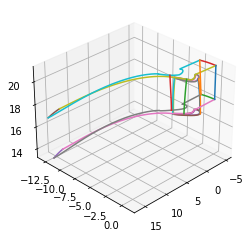

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_block_outline(blocks[0],ax)
plot_block_outline(blocks[1],ax)
ax.view_init(30,45)